In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dkistpkg_ct as dp
from importlib import reload
from scipy.stats import skew
from sklearn import preprocessing
from scipy.optimize import curve_fit
import tol_colors

/Users/coletamburri/Desktop/DKIST_Code/DKIST_analysis_package/dkistpkg_ct.py:2337: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Calibrated Intensity [$W/cm^2/sr/\mathring A$]',fontsize=13)


#### Most of this code is taken from pltmodelingresult which is in the DKIST_Data_Tools folder.  Remade for explicit use for the paper

In [82]:
root = '/Users/coletamburri/Desktop/DKIST_Code/DKIST_analysis_package/'

caII_low = 480
caII_high = 650
hep_low = 700
hep_high = 850
wl = 396.847 # central wavelength, Ca II H

def color_muted2():
    muted =['#332288', '#88CCEE', '#44AA99','#117733','#999933','#DDCC77', '#CC6677','#882255','#AA4499','#DDDDDD']
#  0= indigo
# 1 = cyan
# 2 = teal
# 3 = green
# 4 = olive
# 5= sand
# 6 = rose
# 7 = wine
# 8 = purple
# 9=grey
    return muted

muted = color_muted2()

def conv_to_vel(mu1,mu2,mu,lamb0 = 396.847,c=2.99e5):
    vel1 = []
    vel2 = []
    
    shift1 = []
    shift2 = []
    
    for i in range(len(mu1)):
        shift1.append(mu1[i]-lamb0)
        shift2.append(mu2[i]-lamb0)
        
    for i in range(len(mu1)):
        
        vel1.append(((((shift1[i]+lamb0)/lamb0)-1)*c)/mu)
        vel2.append(((((shift2[i]+lamb0)/lamb0)-1)*c)/mu)
        
    return vel1, vel2



def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

def normalize(arr):
    norm_arr = []
    minimum = np.nanmin(arr)
    maximum = np.nanmax(arr)
    diff_arr = maximum - minimum   
    for i in arr:
        temp = (i - minimum)/(maximum-minimum)
        norm_arr.append(temp)
    return norm_arr

c=2.99e5
lamb0 = 396.847
lamb1 = 397.01
mu = 0.4760111410077789

def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)

def gaussian(x, c1, mu1, sigma1):
    res = c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) )
    return res

def gaussfit(params,selwl,sel):
    fit = gaussian( selwl, params )
    return (fit - sel)

def double_gaussian( x, c1, mu1, sigma1, c2, mu2, sigma2 ):
    res =   (c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) )) \
          + (c2 * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) ))
    return res

In [84]:
# fits - plotting
fits2g = '/Users/coletamburri/Desktop/August_2022_Observations_Paper/fits2g.npz'
centfits = root+'centfits.npz'

data_cent = np.load(centfits)
fits2g_arr = np.load(fits2g)

In [86]:
fits2g_arr

NpzFile '/Users/coletamburri/Desktop/August_2022_Observations_Paper/fits2g.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4

In [88]:
shifts1 = fits2g_arr['arr_0']
shifts2 = fits2g_arr['arr_1']
errs1 = fits2g_arr['arr_2']
errs2 = fits2g_arr['arr_3']
timesraster1 = fits2g_arr['arr_4']

In [90]:
timesraster1[0:7][-7:]

array(['2022-08-19T20:42:07.510', '2022-08-19T20:42:33.514',
       '2022-08-19T20:42:59.517', '2022-08-19T20:43:25.521',
       '2022-08-19T20:43:51.525', '2022-08-19T20:44:17.529',
       '2022-08-19T20:44:43.502'], dtype='<U23')

2024-11-11 15:31:45 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-11 15:31:45 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-11 15:31:45 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<ErrorbarContainer object of 3 artists>

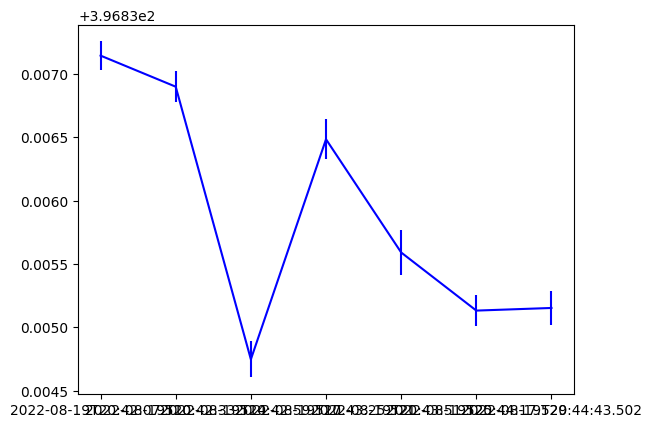

In [92]:
fig,ax = plt.subplots()
ax.errorbar(timesraster1[0:7][-7:],shifts1,yerr=errs1,color='blue')


In [94]:
shifts1

array([396.83714356, 396.83689839, 396.8347473 , 396.83648366,
       396.83559049, 396.83513196, 396.8351527 ])

In [96]:
errs1

array([0.00011152, 0.00012014, 0.00014302, 0.00015718, 0.0001745 ,
       0.00012414, 0.00013539])

In [98]:
shifts2

array([396.85357571, 396.85374512, 396.85314995, 396.85240303,
       396.85098838, 396.85191569, 396.85166265])

In [100]:
errs2

array([0.00011479, 0.00013694, 0.00017503, 0.00016924, 0.00014319,
       0.00013655, 0.00014264])

In [102]:
def conv_to_vel(mu1,mu2,mu,lamb0 = 396.847,c=2.99e5):
    vel1 = []
    vel2 = []
    
    shift1 = []
    shift2 = []
    
    for i in range(len(mu1)):
        shift1.append(mu1[i]-lamb0)
        shift2.append(mu2[i]-lamb0)
        
    for i in range(len(mu1)):
        
        vel1.append(((((shift1[i]+lamb0)/lamb0)-1)*c)/mu)
        vel2.append(((((shift2[i]+lamb0)/lamb0)-1)*c)/mu)
        
    return vel1, vel2

In [104]:
mu =  0.4760111410077789 #location of AR
vels1, vels2 = conv_to_vel(shifts1,shifts2,mu)
maxerrvels1, maxerrvels2 = conv_to_vel(shifts1+errs1,shifts2+errs2,mu)
errvels1 = np.abs(np.subtract(maxerrvels1,vels1))
errvels2 = np.abs(np.subtract(maxerrvels2,vels2))

In [106]:
vels1

[-15.60095814744963,
 -15.989007290128702,
 -19.393791976647933,
 -16.645455302926464,
 -18.059177587973863,
 -18.784948397758413,
 -18.75211864728139]

In [108]:
errvels1

array([0.17651484, 0.19015812, 0.22638138, 0.24878674, 0.27620268,
       0.19649771, 0.21430375])

In [110]:
vels2

[10.408152278070292,
 10.676294629783362,
 9.73424727658417,
 8.552013115387835,
 6.312874789177366,
 7.780647086368932,
 7.380133499877086]

In [112]:
errvels2

array([0.18169935, 0.21674898, 0.27703534, 0.26788398, 0.22664302,
       0.21613627, 0.22577792])

2024-11-11 15:35:49 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-11 15:35:49 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-11 15:35:49 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-11 15:35:49 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-11 15:35:49 - matplotlib.categor

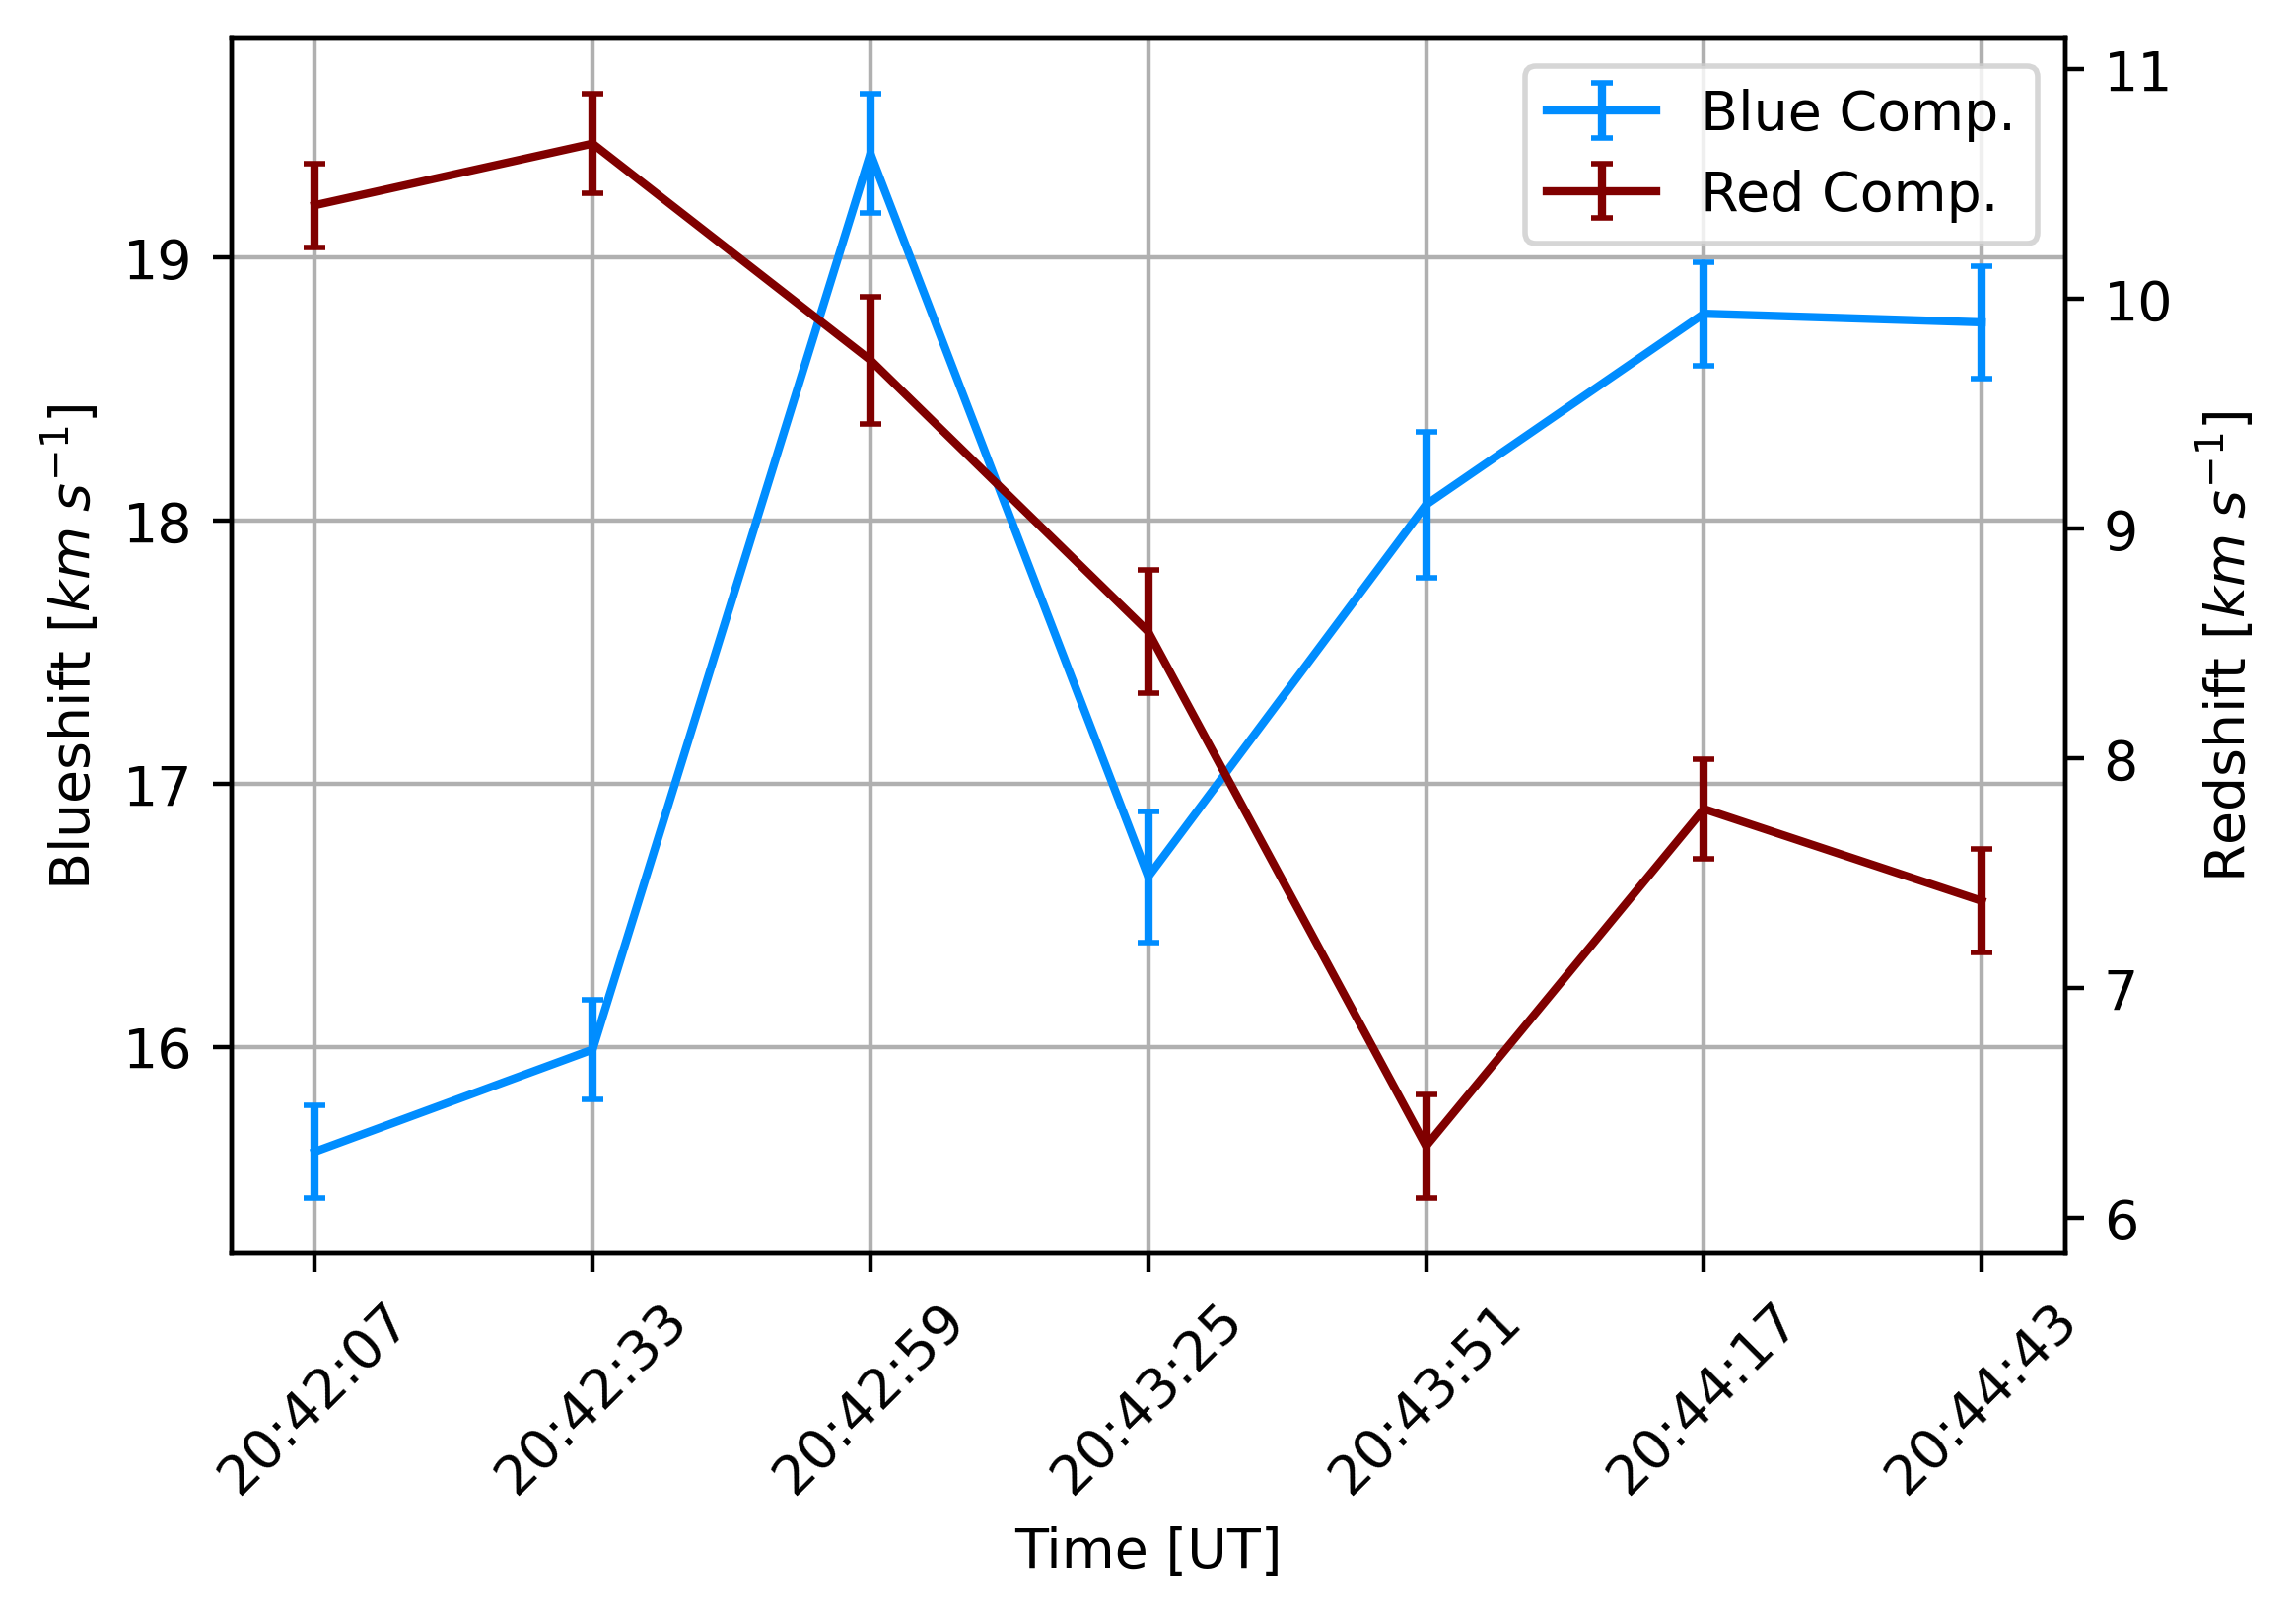

In [151]:
fig,ax=plt.subplots(figsize=(6,4),dpi=400)
lns1 = ax.errorbar(timesstr[0:7],np.abs(vels1),yerr =errvels1,capsize=2,color=colors[5],label='Blue Comp.')
ax1 = ax.twinx()
lns2 = ax1.errorbar(timesstr[0:7],vels2,yerr =errvels2,capsize=2,color=colors[19],label='Red Comp.')
ax.set_xlabel('Time [UT]')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=0,fontsize=10)
labs = ['Red Comp.','','Blue Comp.','']
ax.set_ylabel(r'Blueshift [$km\;s^{-1}$]')
ax1.set_ylabel(r'Redshift [$km\;s^{-1}$]')
ax.grid()
ax.set_xticks(timesstr[0:7], timesstr[0:7], rotation=45)


In [153]:
timesstr = [i[-12:-4] for i in timesraster1]
timesstr

['20:42:07',
 '20:42:33',
 '20:42:59',
 '20:43:25',
 '20:43:51',
 '20:44:17',
 '20:44:43',
 '20:45:09',
 '20:45:35',
 '20:46:01',
 '20:46:27']

In [157]:
storeamp1_2_on = data_cent['arr_0']
storeamp2_2_on = data_cent['arr_1']
storesig1_2_on = data_cent['arr_2']
storesig2_2_on = data_cent['arr_3']
storemu1_2_on = data_cent['arr_4']
storemu2_2_on = data_cent['arr_5']
bkgd_subtract_flaretime = data_cent['arr_6']
dispersion_range_fin_on = data_cent['arr_7']
spatial_range = data_cent['arr_8']
maxindices = data_cent['arr_9']

In [159]:
np.shape(spatial_range)

(2544,)

In [161]:
#example convolution with gaussian psf
def gaussian_psf_space(x, fwhm):
	#x = space [pix]
	# fwhm in [pix]
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # Calculate sigma from FWHM
    tr = np.exp(-(x)**2 / (2 * (sigma**2)))
    tr /= tr.sum()
    return tr
#write adjustment for point spread function from atlas

def psf_adjust(wlsel,ilamsel,fwhm,new_dispersion_range,ntw,gaussian_psf):
   
    
    func=interp1d(wlsel,ilamsel,kind='linear',fill_value='extrapolate')
    yatlas = func(new_dispersion_range)
    dw=new_dispersion_range[1]-new_dispersion_range[0]
    dw=dw
    tw=(np.arange(ntw)-ntw//2)*dw
    
    for i in range(1):

    	psf = gaussian_psf(tw, fwhm) # guassian transmission profiles
    	yconv = convolve(yatlas, psf, mode='same', method='fft')
        
    return yconv

from scipy.interpolate import interp1d
from scipy.signal import convolve

In [163]:
selwlshift=selwl-lamb0
gauss2fity = double_gaussian(selwl,storeamp1_2_on[0],storemu1_2_on[0],storesig1_2_on[0],\
                             storeamp2_2_on[0],storemu2_2_on[0],storesig2_2_on[0])

comp1fity = gaussian(selwl,storeamp1_2_on[0],storemu1_2_on[0],storesig1_2_on[0])
comp2fity = gaussian(selwl,storeamp2_2_on[0],storemu2_2_on[0],storesig2_2_on[0])

gauss2fitynorm = normalize(gauss2fity)
# comp1fitynorm = (comp1fity - min(gauss2fity))/(max(gauss2fity)-min(gauss2fity))
# comp2fitynorm = (comp2fity - min(gauss2fity))/(max(gauss2fity)-min(gauss2fity))


In [165]:
# fit single gaussian
fit = curve_fit(gaussian,selwl,sels[10],p0=[3e6,396.85,.02])
gauss1fit = gaussian(selwl,fit[0][0],fit[0][1],fit[0][2])

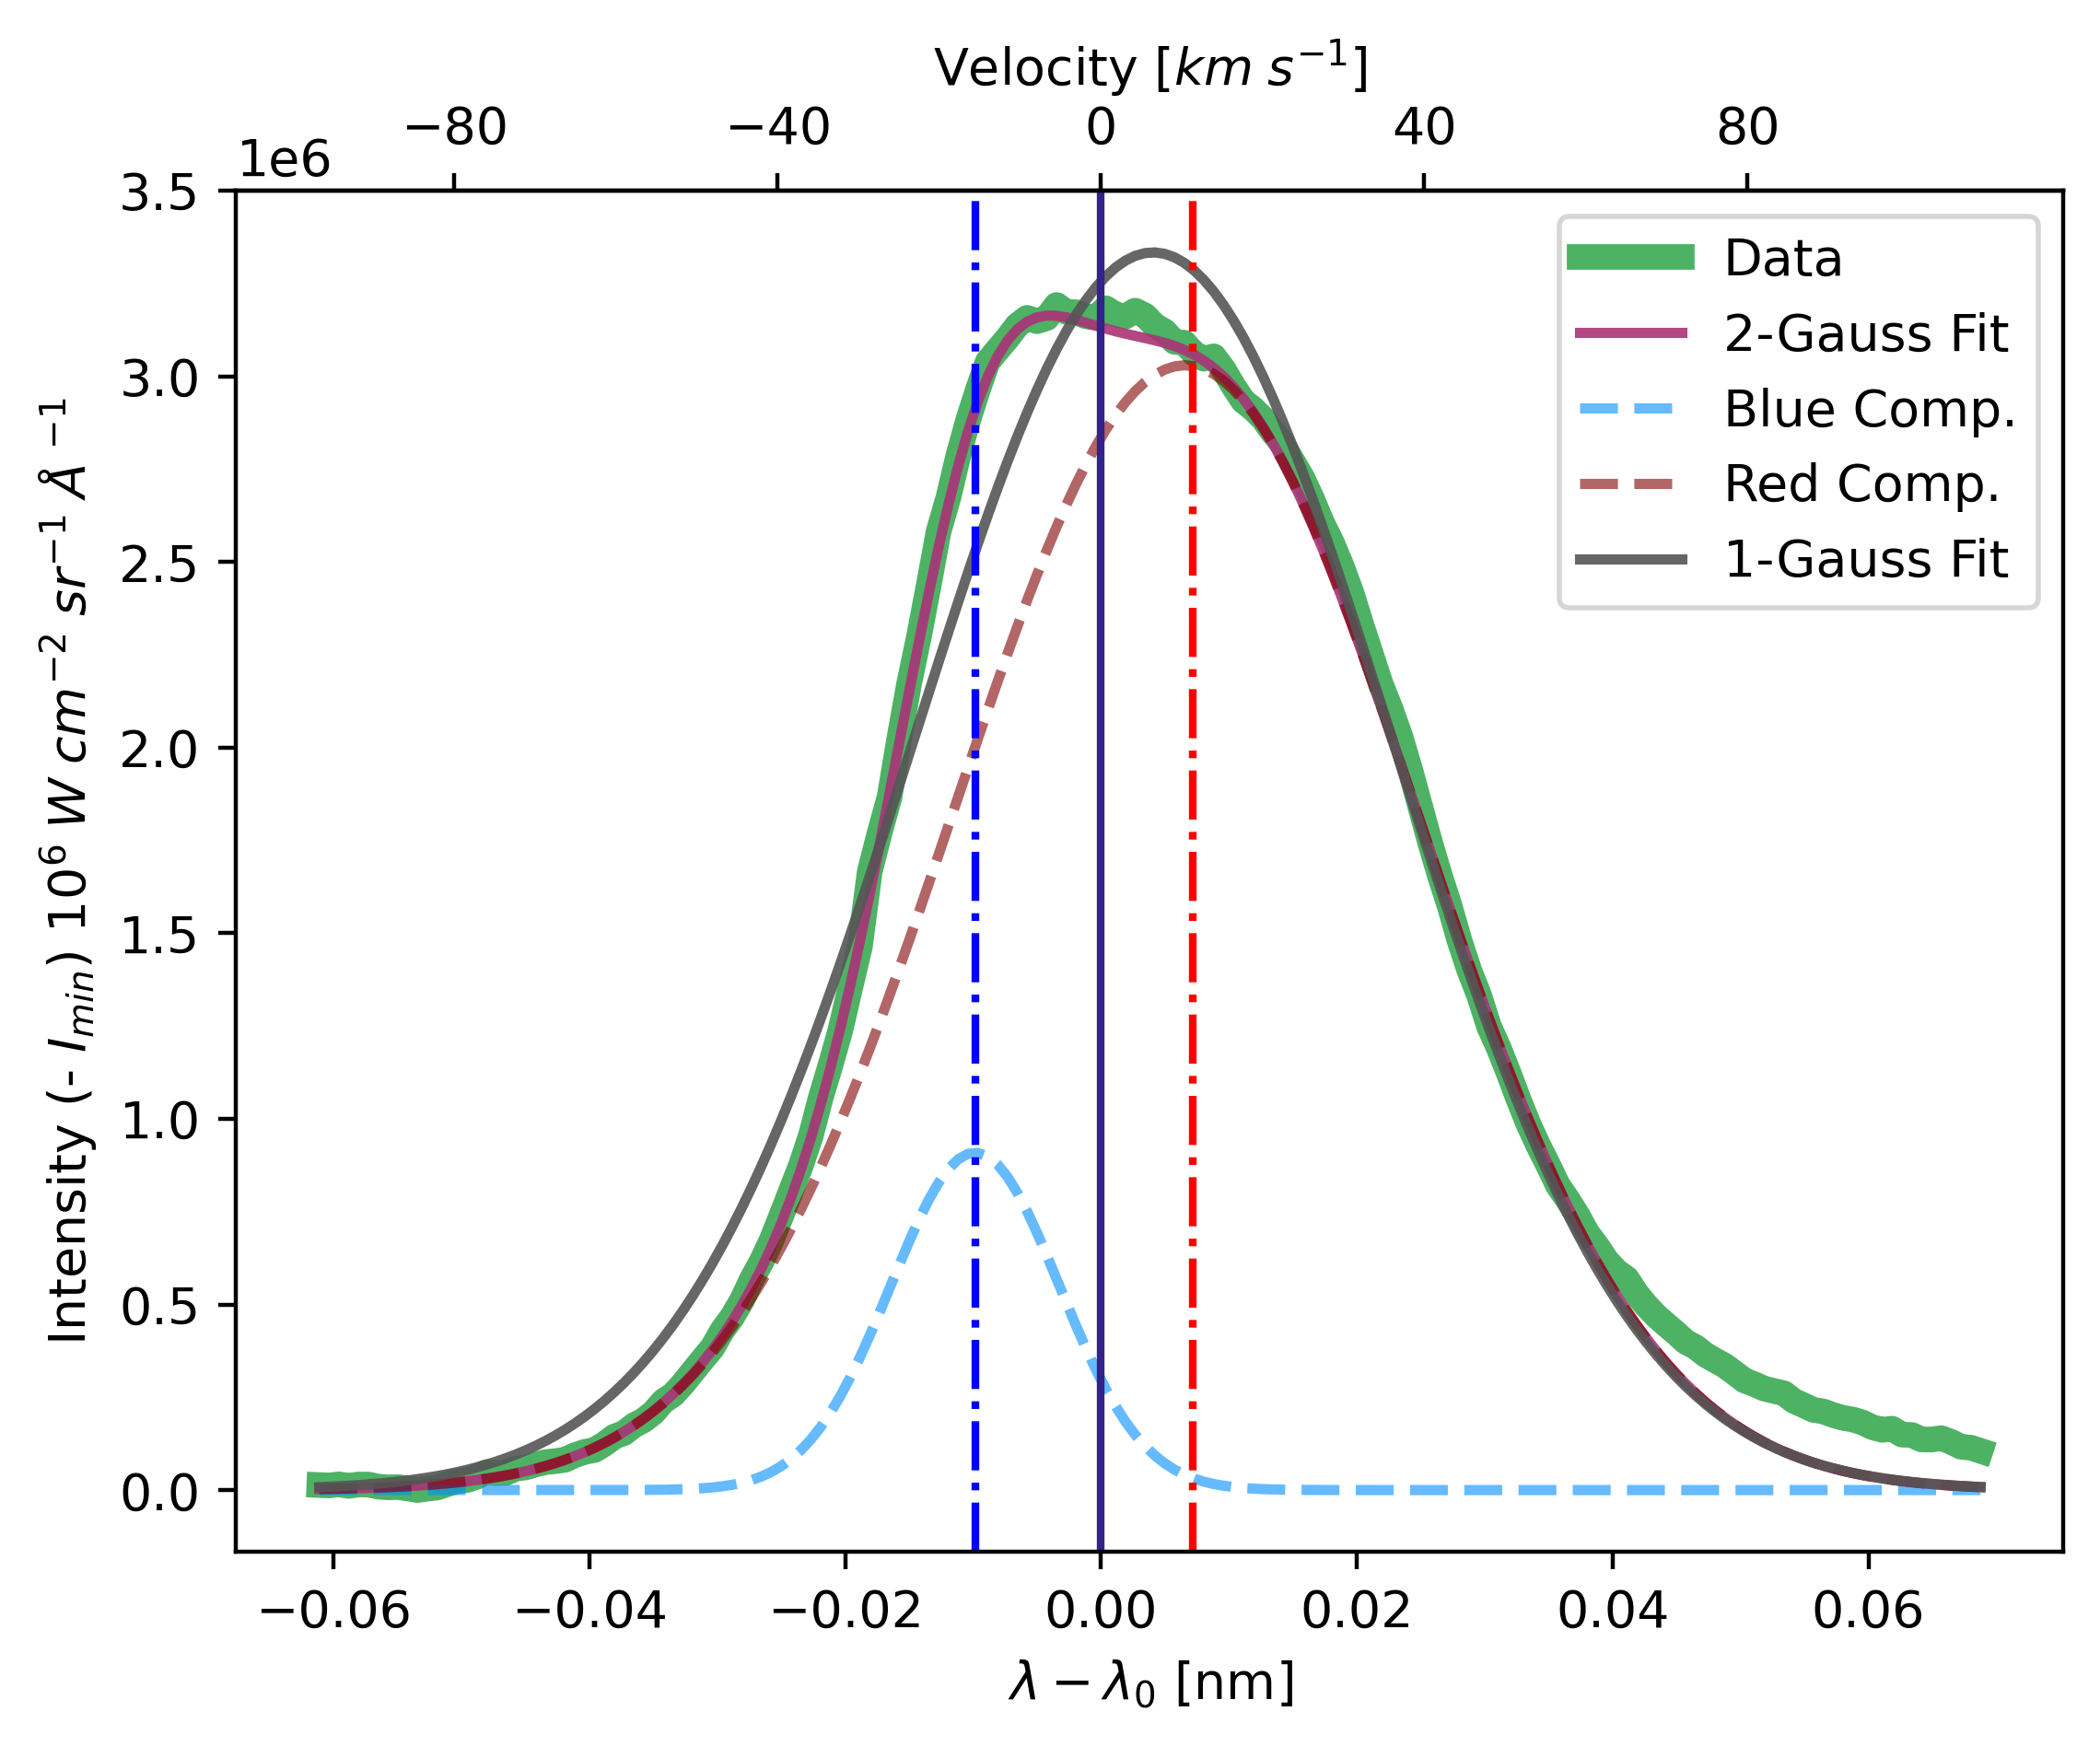

In [167]:
lamb0 = wl
c=2.99e5
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu
    #return ((((x+lamb0)/lamb0)-1)*c) #old, no mu angle difference

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)
fig,ax=plt.subplots(dpi=400)
ax.plot(selwlshift,sels[10],color=cmap_choice[10],linewidth=5,label='Data')
ax.plot(selwlshift,gauss2fity,color='#AA3377',label='2-Gauss Fit',alpha = .9,linewidth=2)
ax.plot(selwlshift,comp1fity,'--',color=colors[5],label='Blue Comp.',alpha=0.6,linewidth=2)
ax.plot(selwlshift,comp2fity,'--',color=colors[19],label='Red Comp.',alpha=0.6,linewidth=2)
ax.plot(selwlshift,gauss1fit,color='#555555',label='1-Gauss Fit',alpha = .9,linewidth=2)
ax.grid(alpha=.5)
ax.set_xlabel(r'$\lambda - \lambda_0$ [nm]')
ax.set_ylabel(r'Intensity (- $I_{min}$) $10^6\; W\; cm^{-2}\; sr^{-1}\; \AA\; ^{-1}$')
ax.legend(loc='upper right')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
secaxx.set_xticks([-80,-40,0,40,80])
ax.grid()
ax.axvline(0,color='#332288')
ax.axvline(-.0098,color='blue',linestyle='-.')
ax.axvline(.0072,color='red',linestyle='-.')

#ax.set_ylabel('Proportion of line height')

In [169]:
spatial_range2 = np.insert(spatial_range,0,spatial_range[0]-(spatial_range[1]-spatial_range[0]))

In [254]:
dispersion_range_fin_on[480]

396.7858838032756

In [250]:
dispersion_range_fin_on[650]

396.916538043193

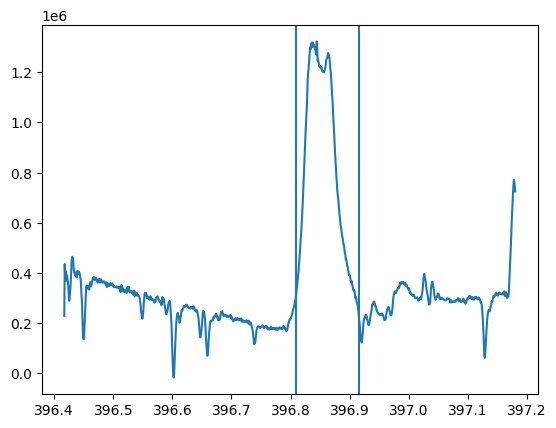

In [248]:
fig,ax=plt.subplots()
ax.plot(dispersion_range_fin_on,bkgd_subtract_flaretime[0,:,1500])
ax.axvline(dispersion_range_fin_on[510])
ax.axvline(dispersion_range_fin_on[650])

In [246]:
dispersion_range_fin_on[620]

396.89348141261934

In [171]:
img1 = bkgd_subtract_flaretime[0,510:620,1200:1550]
img2 = bkgd_subtract_flaretime[1,510:620,1200:1550]
img3 = bkgd_subtract_flaretime[2,510:620,1200:1550]
img4 = bkgd_subtract_flaretime[3,510:620,1200:1550]
img5 = bkgd_subtract_flaretime[4,510:620,1200:1550]
img6 = bkgd_subtract_flaretime[5,510:620,1200:1550]
img7 = bkgd_subtract_flaretime[6,510:620,1200:1550]

[X,Y]= np.meshgrid(spatial_range2[1200:1551],dispersion_range_fin_on[510:621])

In [173]:
mincbar = np.min(img1)
maxcbar = np.max(img1)

In [175]:
selwl = dispersion_range_fin_on[caII_low:caII_high]

[]

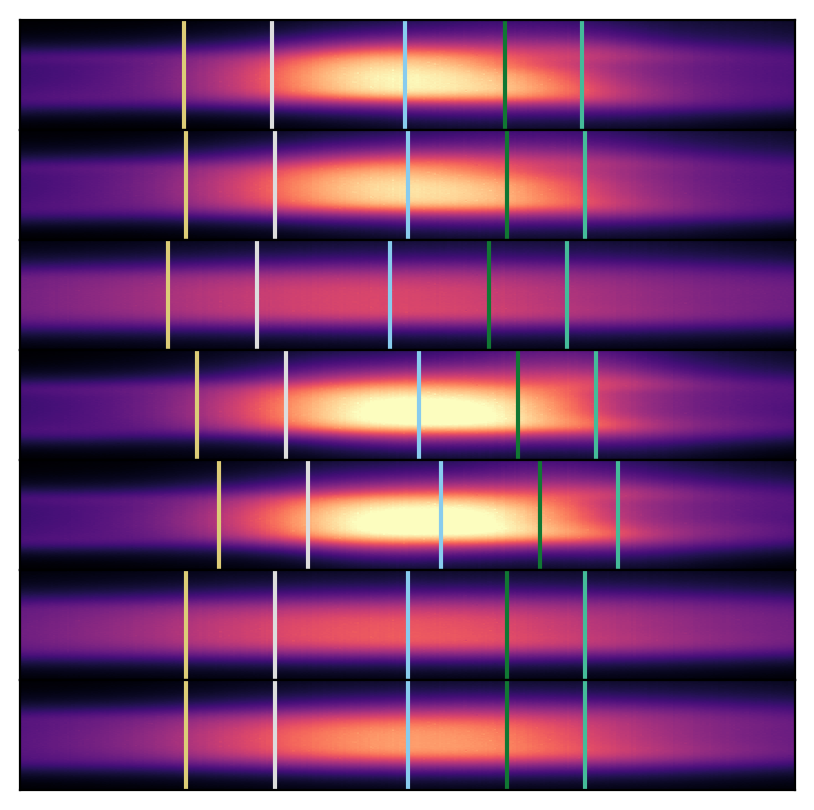

In [177]:
fig,ax=plt.subplots(7,1,figsize=(5,5),dpi=200)
ax[0].pcolormesh(X,Y,img1,vmin=mincbar,vmax=maxcbar,cmap='magma')
ax[1].pcolormesh(X,Y,img2,vmin=mincbar,vmax=maxcbar,cmap='magma')
ax[2].pcolormesh(X,Y,img3,vmin=mincbar,vmax=maxcbar,cmap='magma')
ax[3].pcolormesh(X,Y,img4,vmin=mincbar,vmax=maxcbar,cmap='magma')
ax[4].pcolormesh(X,Y,img5,vmin=mincbar,vmax=maxcbar,cmap='magma')
ax[5].pcolormesh(X,Y,img6,vmin=mincbar,vmax=maxcbar,cmap='magma')
ax[6].pcolormesh(X,Y,img7,vmin=mincbar,vmax=maxcbar,cmap='magma')
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(7):
    ax[i].axvline(spatial_range[maxindices[[i]]],color='#88CCEE')
    
for i in range(7):
    ax[i].axvline(spatial_range[maxindices[[i]]-100],color='#DDCC77')
    
for i in range(7):
    ax[i].axvline(spatial_range[maxindices[[i]]-60],color='#DDDDDD')
    
for i in range(7):
    ax[i].axvline(spatial_range[maxindices[[i]]+45],color='#117733')
    
for i in range(7):
    ax[i].axvline(spatial_range[maxindices[[i]]+80],color='#44BB99')

ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])
ax[4].set_yticks([])
ax[5].set_yticks([])
ax[6].set_yticks([])

ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])
ax[4].set_xticks([])
ax[5].set_xticks([])
ax[6].set_xticks([])
                 

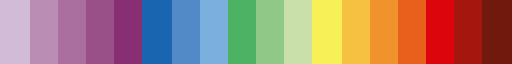

In [179]:
maps = tol_colors.TOLcmaps()
maps.get('rainbow_discrete',18)

[]

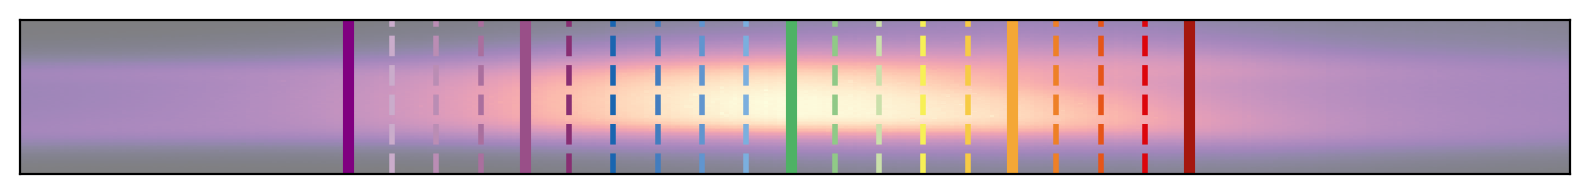

In [182]:
# just first time step
ncol = 20
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol+4)
cmap_choice = map(np.linspace(0,1,ncol+2))
fig,ax=plt.subplots(figsize=(10,1),dpi=200)
ax.pcolormesh(X,Y,img1,vmin=mincbar,vmax=maxcbar,cmap='magma',alpha=.5)
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(ncol):
    if i == 0:
        ax.axvline(spatial_range[maxindices[[0]]-100+(i*10)],color='purple',linewidth=4,alpha=1)
    elif i == 4 or i==10 or i == 15 or i == 19:
        ax.axvline(spatial_range[maxindices[[0]]-100+(i*10)],color=cmap_choice[i],linewidth=4,alpha=1)
    else:
        ax.axvline(spatial_range[maxindices[[0]]-100+(i*10)],linestyle='--',color=cmap_choice[i],linewidth=2,alpha=1)

ax.set_yticks([])
ax.set_xticks([])

                 

[]

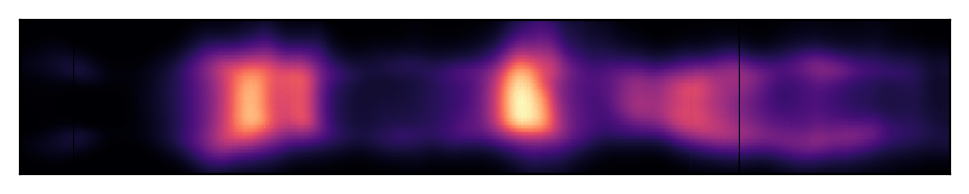

In [184]:
fig,ax=plt.subplots(figsize=(6,1),dpi=200)
ax.pcolormesh(bkgd_subtract_flaretime[0,510:620,:],vmin=mincbar,vmax=maxcbar,cmap='magma')
ax.set_xticks([])
ax.set_yticks([])

In [186]:
mu =  0.4760111410077789
vel1_on,vel2_on = conv_to_vel(storemu1_2_on,storemu2_2_on,mu)

maxindex_frame1 = maxindices[0]
indices = np.arange(maxindex_frame1-100,maxindex_frame1+100,10)
frame1 = bkgd_subtract_flaretime[0,:,:]

frame1 = np.expand_dims(frame1, axis=0)

caII_low = 480
caII_high = 650
hep_low = 700
hep_high = 850
wl = 396.847 # central wavelength, Ca II H

In [188]:
sels=[]

for i in range(len(indices)):
    sliceind = indices[i]
    sel = frame1[0,caII_low:caII_high,sliceind]-\
        min(frame1[0,caII_low:caII_high,sliceind])
    selwl = dispersion_range_fin_on[caII_low:caII_high]
    sels.append(sel)

In [190]:
indices

array([1273, 1283, 1293, 1303, 1313, 1323, 1333, 1343, 1353, 1363, 1373,
       1383, 1393, 1403, 1413, 1423, 1433, 1443, 1453, 1463])

Text(0.5, 0, 'Velocity $[km\\; s^{-1}]$')

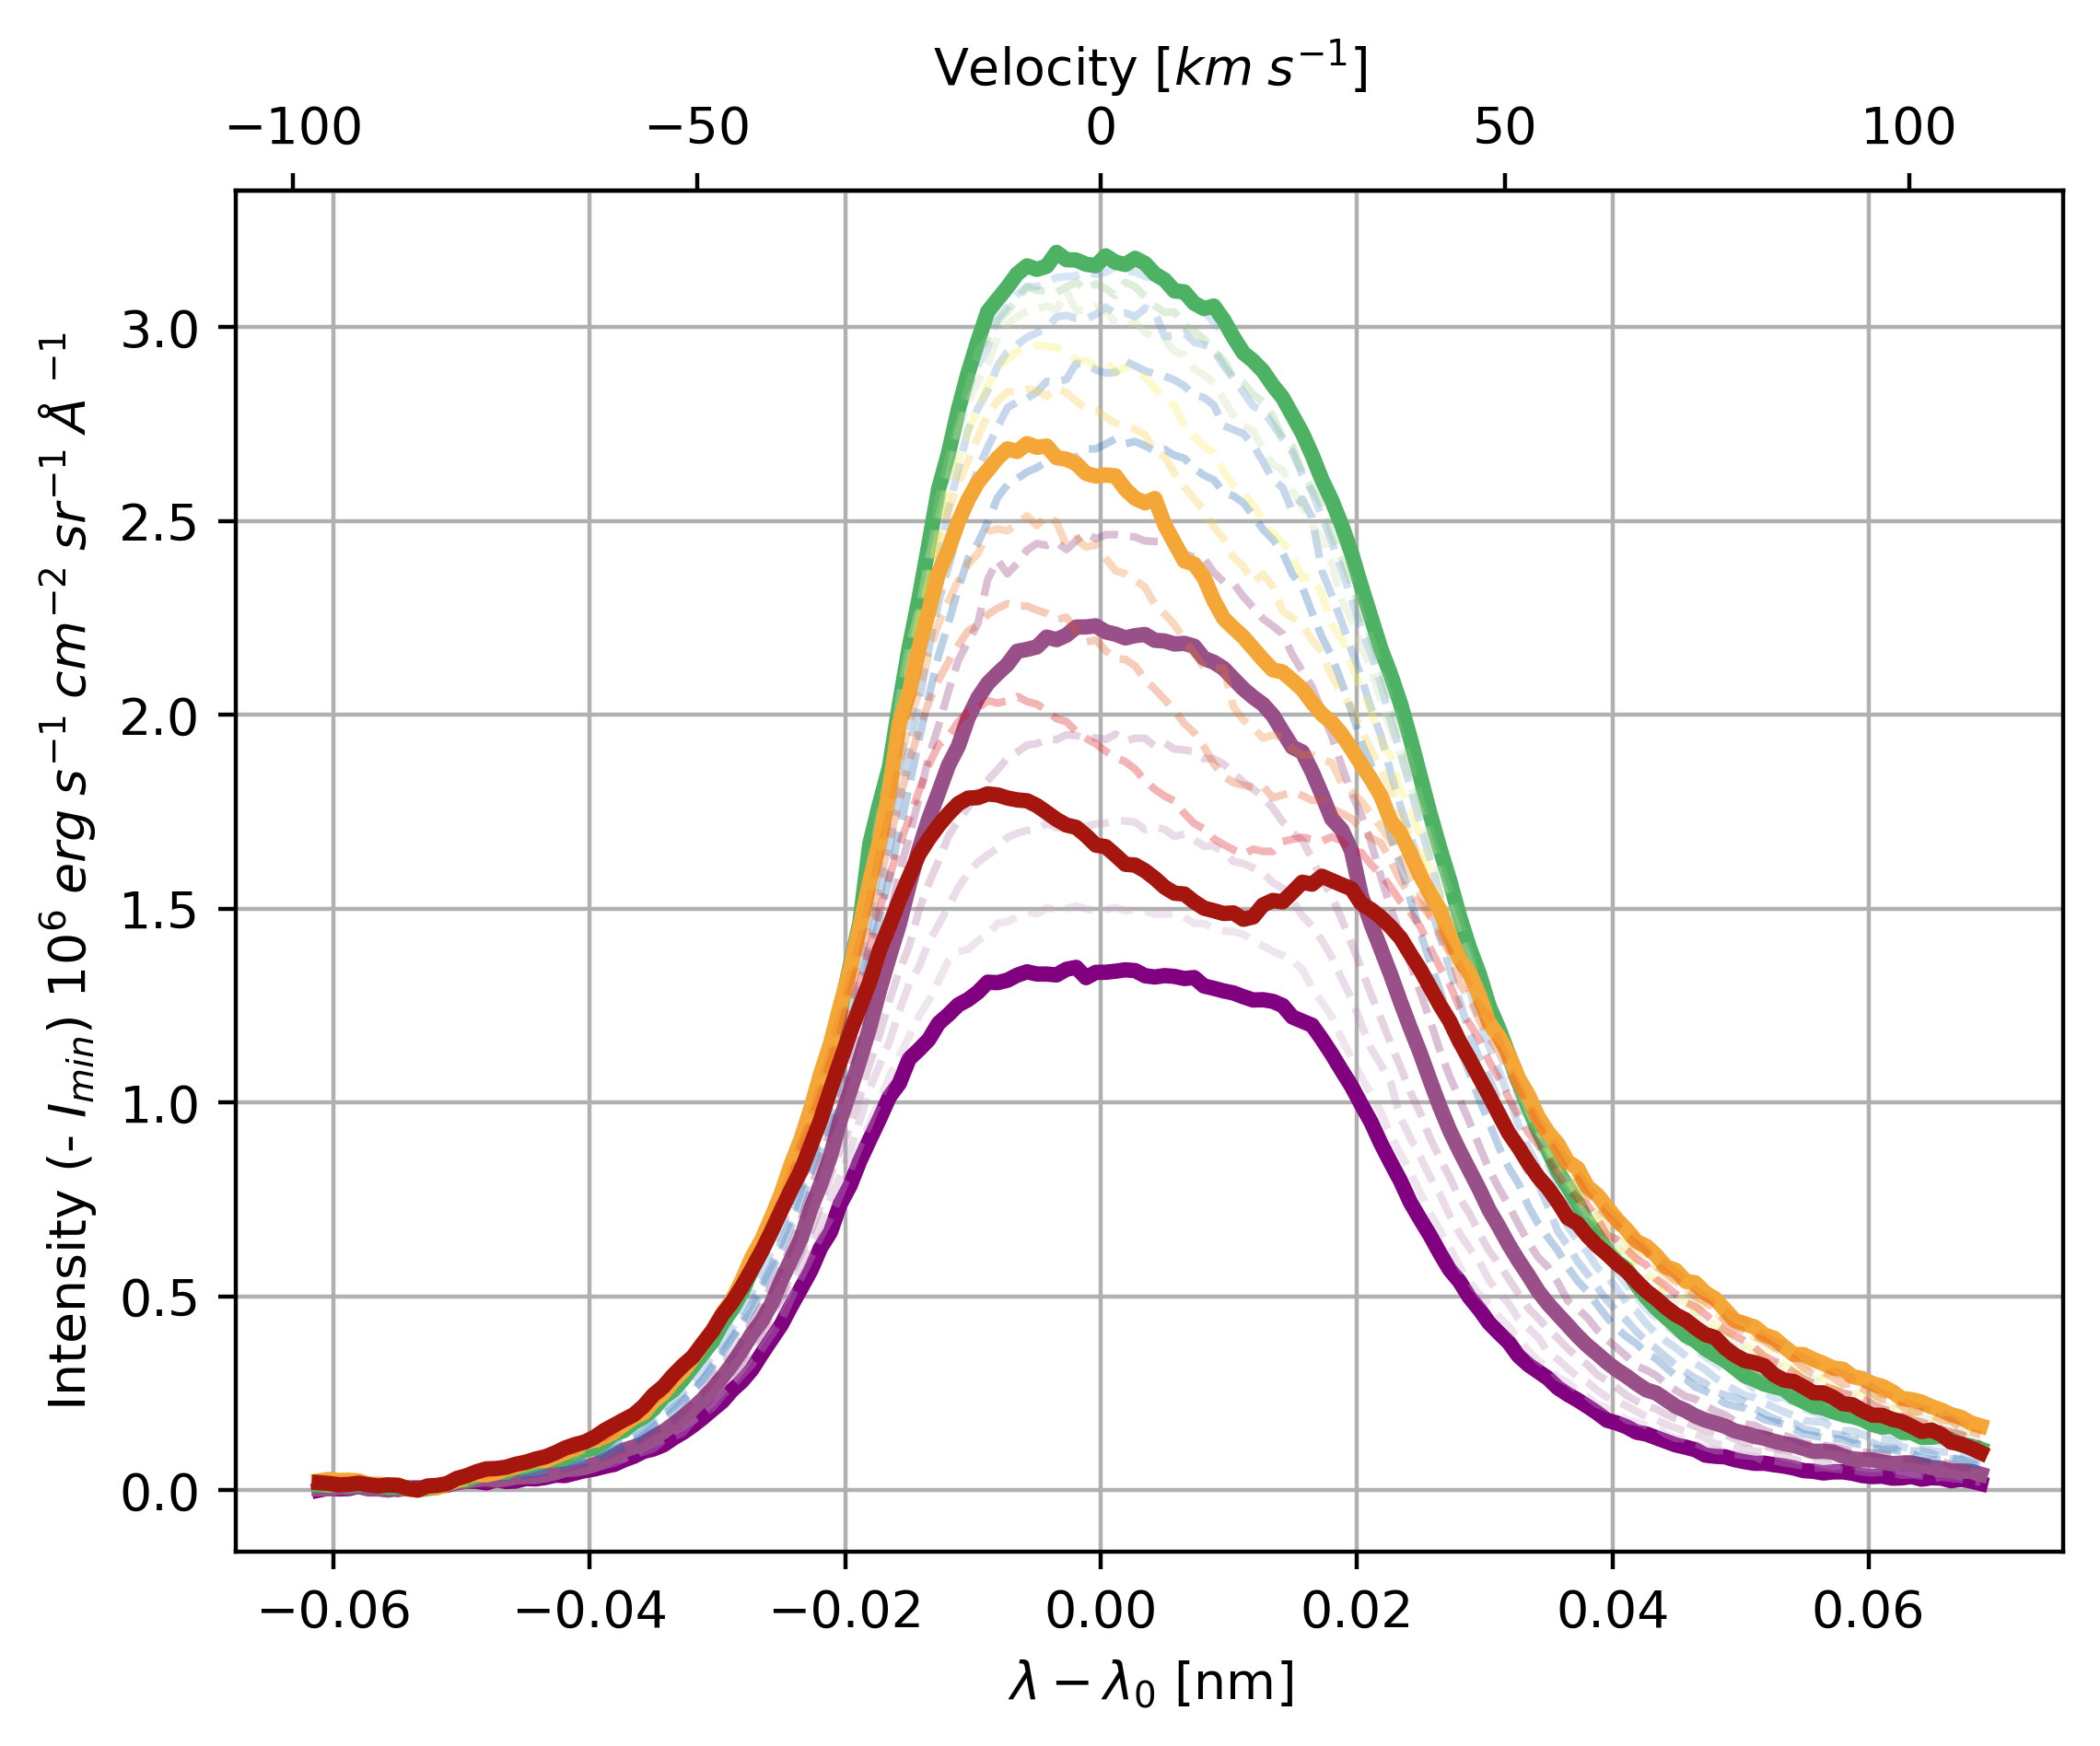

In [257]:
n = 20
colors = plt.cm.jet(np.linspace(0,1,n))

fig,ax=plt.subplots(dpi=400)
for i in range(n):
    if i == 0:
        ax.plot(selwlshift,sels[i]/1e6,color='purple',linewidth=3)
    elif i == 4 or i==10 or i == 15 or i == 19:
        ax.plot(selwlshift,sels[i]/1e6,color=cmap_choice[i],linewidth=3)
    else:
        ax.plot(selwlshift,sels[i]/1e6,color=cmap_choice[i],alpha=.3,linestyle='--')

ax.grid()
ax.set_xlabel(r'$\lambda - \lambda_0$ [nm]')
ax.set_ylabel(r'Intensity (- $I_{min}$) $10^6\; erg\;s^{-1}\; cm^{-2}\; sr^{-1}\; \AA\; ^{-1}$')
#ax.set_title('Ca II H flare-time emission across flare ribbon')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
#ax.annotate('Violet - leading edge\nYellow - trailing edge',[396.88,4e6])

In [218]:
leftindss = []
rightindss = []
levss = []
centroidss = []
centroidss0 = []
widths = []
widths0 = []
sels_scp =sels
#generalize
for i in range(len(sels)):
    forcentroids = sels_scp[i]
    minval = min(forcentroids)
    maxval = max(forcentroids)
    levs = np.linspace(minval,maxval,11)
    
    levss.append(levs)
    
    leftinds = []
    rightinds = []
    leftvals = []
    rightvals = []

    for j in levs:
        leftval,leftind = find_nearest(forcentroids[0:round(len(forcentroids)/2)],j)
        rightval,rightind0 = find_nearest(forcentroids[round(len(forcentroids)/2):],j)
        rightind = round(len(forcentroids)/2)+rightind0

        leftinds.append(leftind)
        rightinds.append(rightind)

        leftvals.append(leftval)
        rightvals.append(rightval)
    
    leftindss.append(leftinds)
    rightindss.append(rightinds)
    
    rightwls = selwl[rightinds]
    leftwls = selwl[leftinds]
    centroids = []
    centroids0 = []

    for j in range(len(rightwls)):
        rightwl = rightwls[j]
        leftwl = leftwls[j]
        centroids.append(np.mean([rightwl,leftwl]))
        centroids0.append(np.mean([rightwl,leftwl])-396.85)
        

    centroidss.append(centroids)
    centroidss0.append(centroids0)


In [220]:
leftwls = selwl[leftindss]
rightwls = selwl[rightindss]

In [222]:
widths = np.subtract(rightwls,leftwls)
np.shape(widths)

(20, 11)

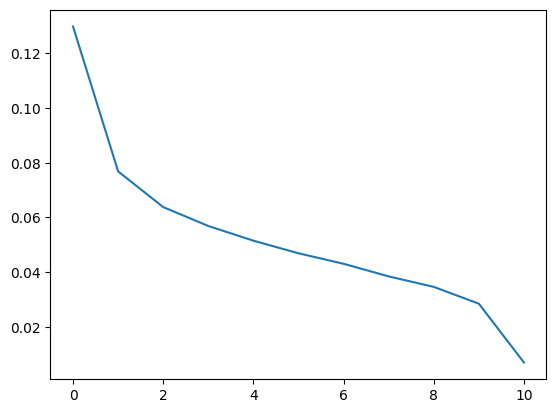

In [224]:
plt.plot(range(len(widths[0])),widths[0])

In [226]:
normlevss = []
for i in range(len(levss)):
    levs = levss[i]
    normlevss.append(preprocessing.normalize([levs]))

In [228]:
    if i == 0:
        ax.plot(selwl,sels[i]/1e6,color='purple',linewidth=3)
    elif i == 4 or i==10 or i == 15 or i == 19:
        ax.plot(selwl,sels[i]/1e6,color=cmap_choice[i],linewidth=3)
    else:
        ax.plot(selwl,sels[i]/1e6,color=cmap_choice[i],alpha=.3,linestyle='--')

Text(0, 0.5, 'Proportion of line height')

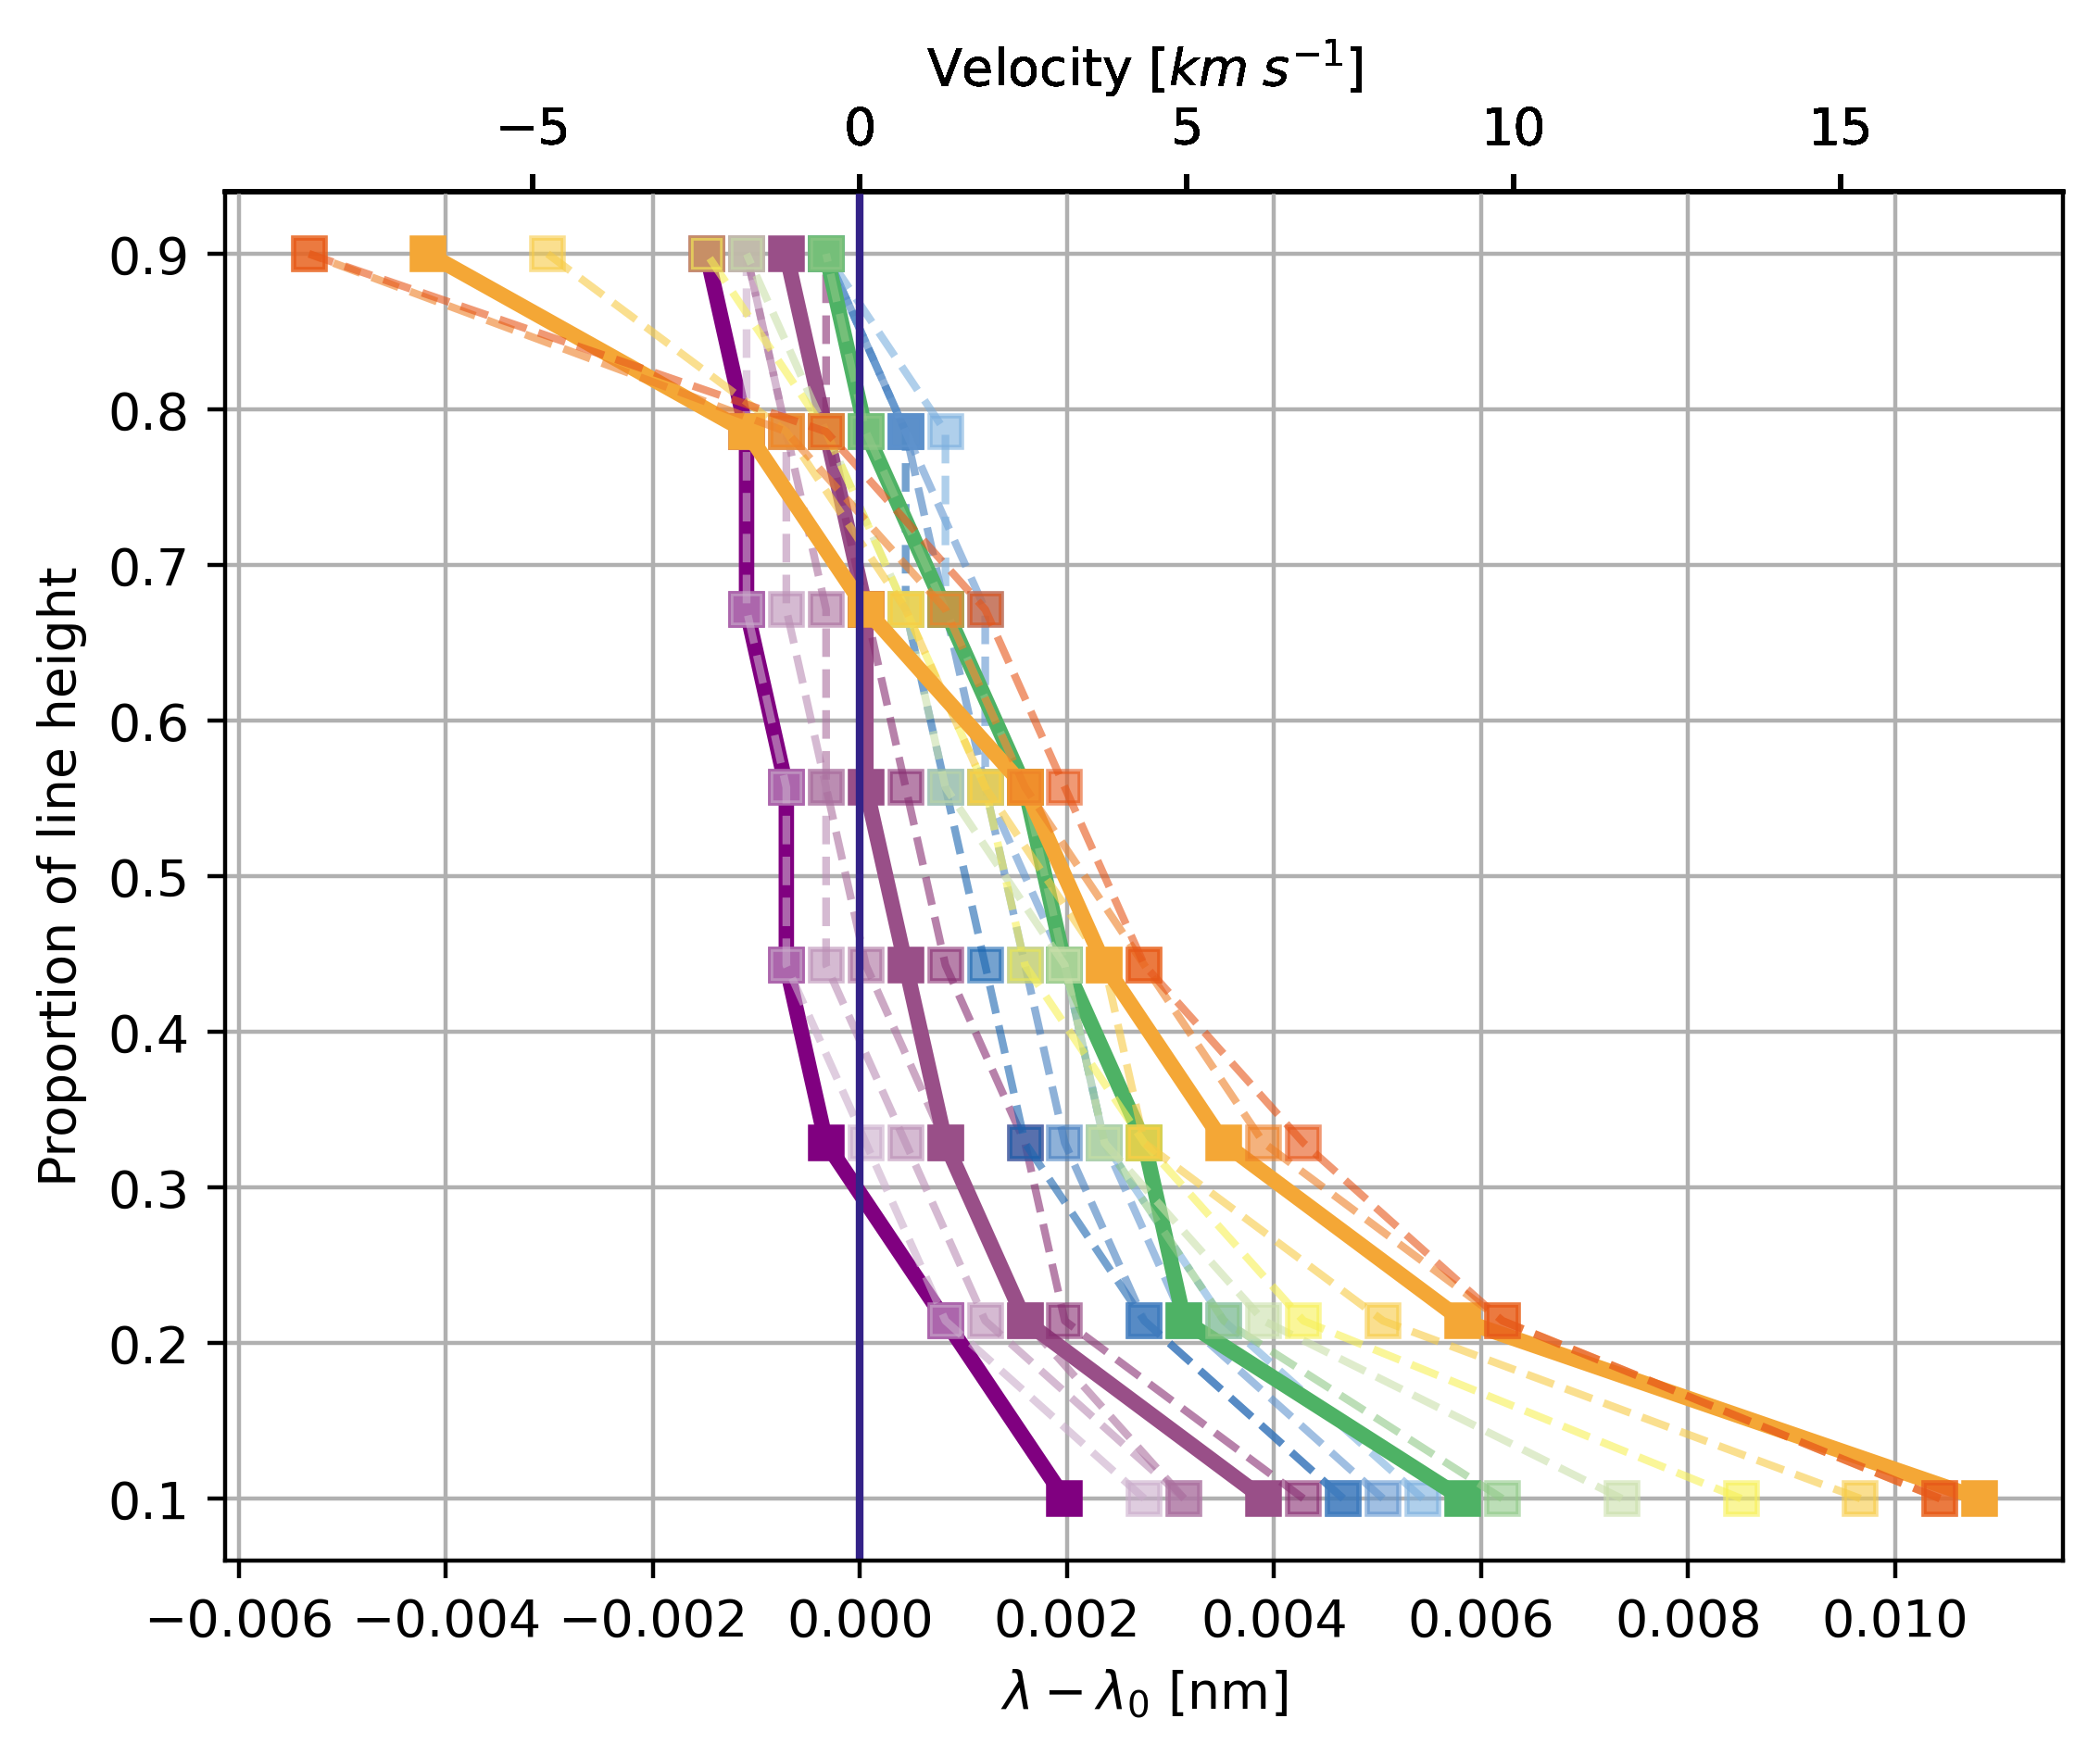

In [230]:
fig,ax=plt.subplots(dpi=400)

lamb0 = wl
c=2.99e5
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu
    #return ((((x+lamb0)/lamb0)-1)*c) #old, no mu angle difference

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)


for i in range(18):
    if i == 0:
        ax.plot(centroidss0[i][1:-2],np.linspace(.1,.9,8),marker='s',color='purple',linewidth=3)
    elif i == 4 or i==10 or i == 15 or i == 19:
        ax.plot(centroidss0[i][1:-2],np.linspace(.1,.9,8),marker='s',color=cmap_choice[i],linewidth=3)
    else:
        ax.plot(centroidss0[i][1:-2],np.linspace(.1,.9,8),marker='s',color=cmap_choice[i],linestyle='--',alpha=.6)
    secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
    secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
ax.grid()
ax.axvline(0,color='#332288')
ax.set_xlabel(r'$\lambda - \lambda_0$ [nm]')
ax.set_ylabel('Proportion of line height')


Text(0, 0.5, 'Proportion of line height')

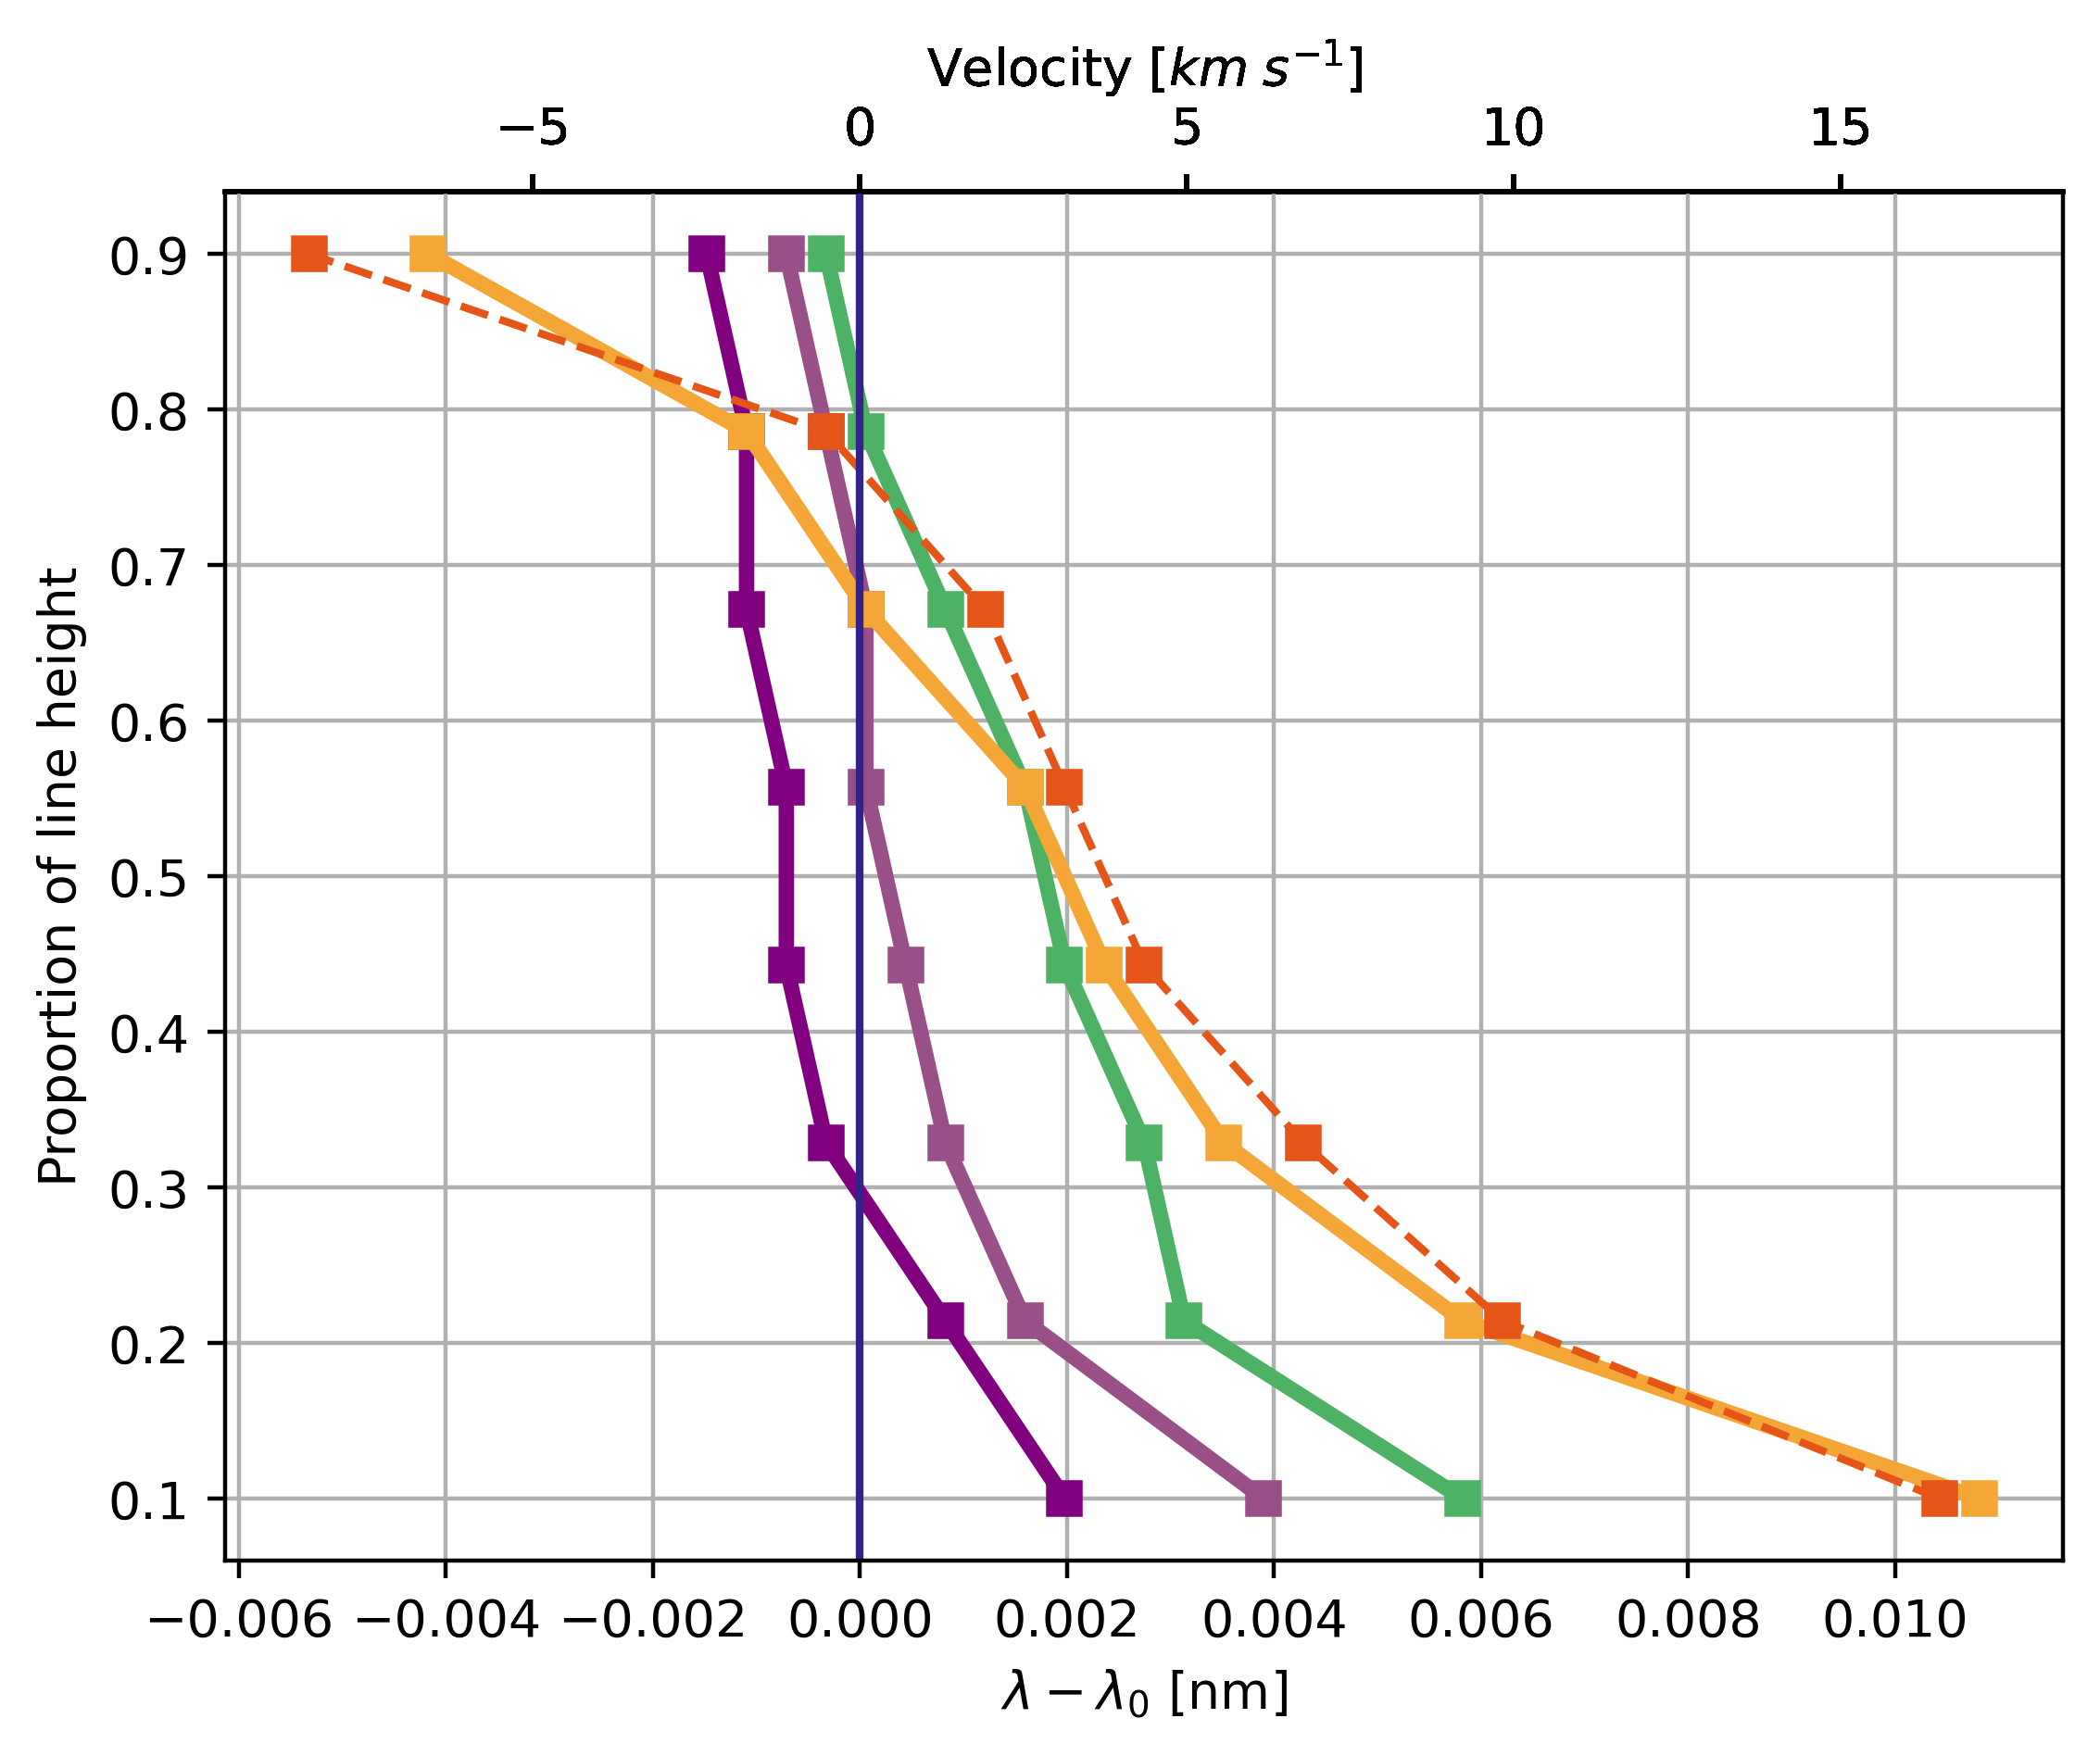

In [232]:
fig,ax=plt.subplots(dpi=400)

lamb0 = wl
c=2.99e5
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu
    #return ((((x+lamb0)/lamb0)-1)*c) #old, no mu angle difference

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)


for i in range(18):
    if i == 0:
        ax.plot(centroidss0[i][1:-2],np.linspace(.1,.9,8),marker='s',color='purple',linewidth=3)
    elif i == 4 or i==10 or i == 15:
        ax.plot(centroidss0[i][1:-2],np.linspace(.1,.9,8),marker='s',color=cmap_choice[i],linewidth=3)
    elif i == 17:
        ax.plot(centroidss0[i][1:-2],np.linspace(.1,.9,8),marker='s',color=cmap_choice[i],linestyle='--',alpha=1)
    secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
    secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
ax.grid()
ax.axvline(0,color='#332288')
ax.set_xlabel(r'$\lambda - \lambda_0$ [nm]')
ax.set_ylabel('Proportion of line height')

Text(0, 0.5, 'Proportion of line height')

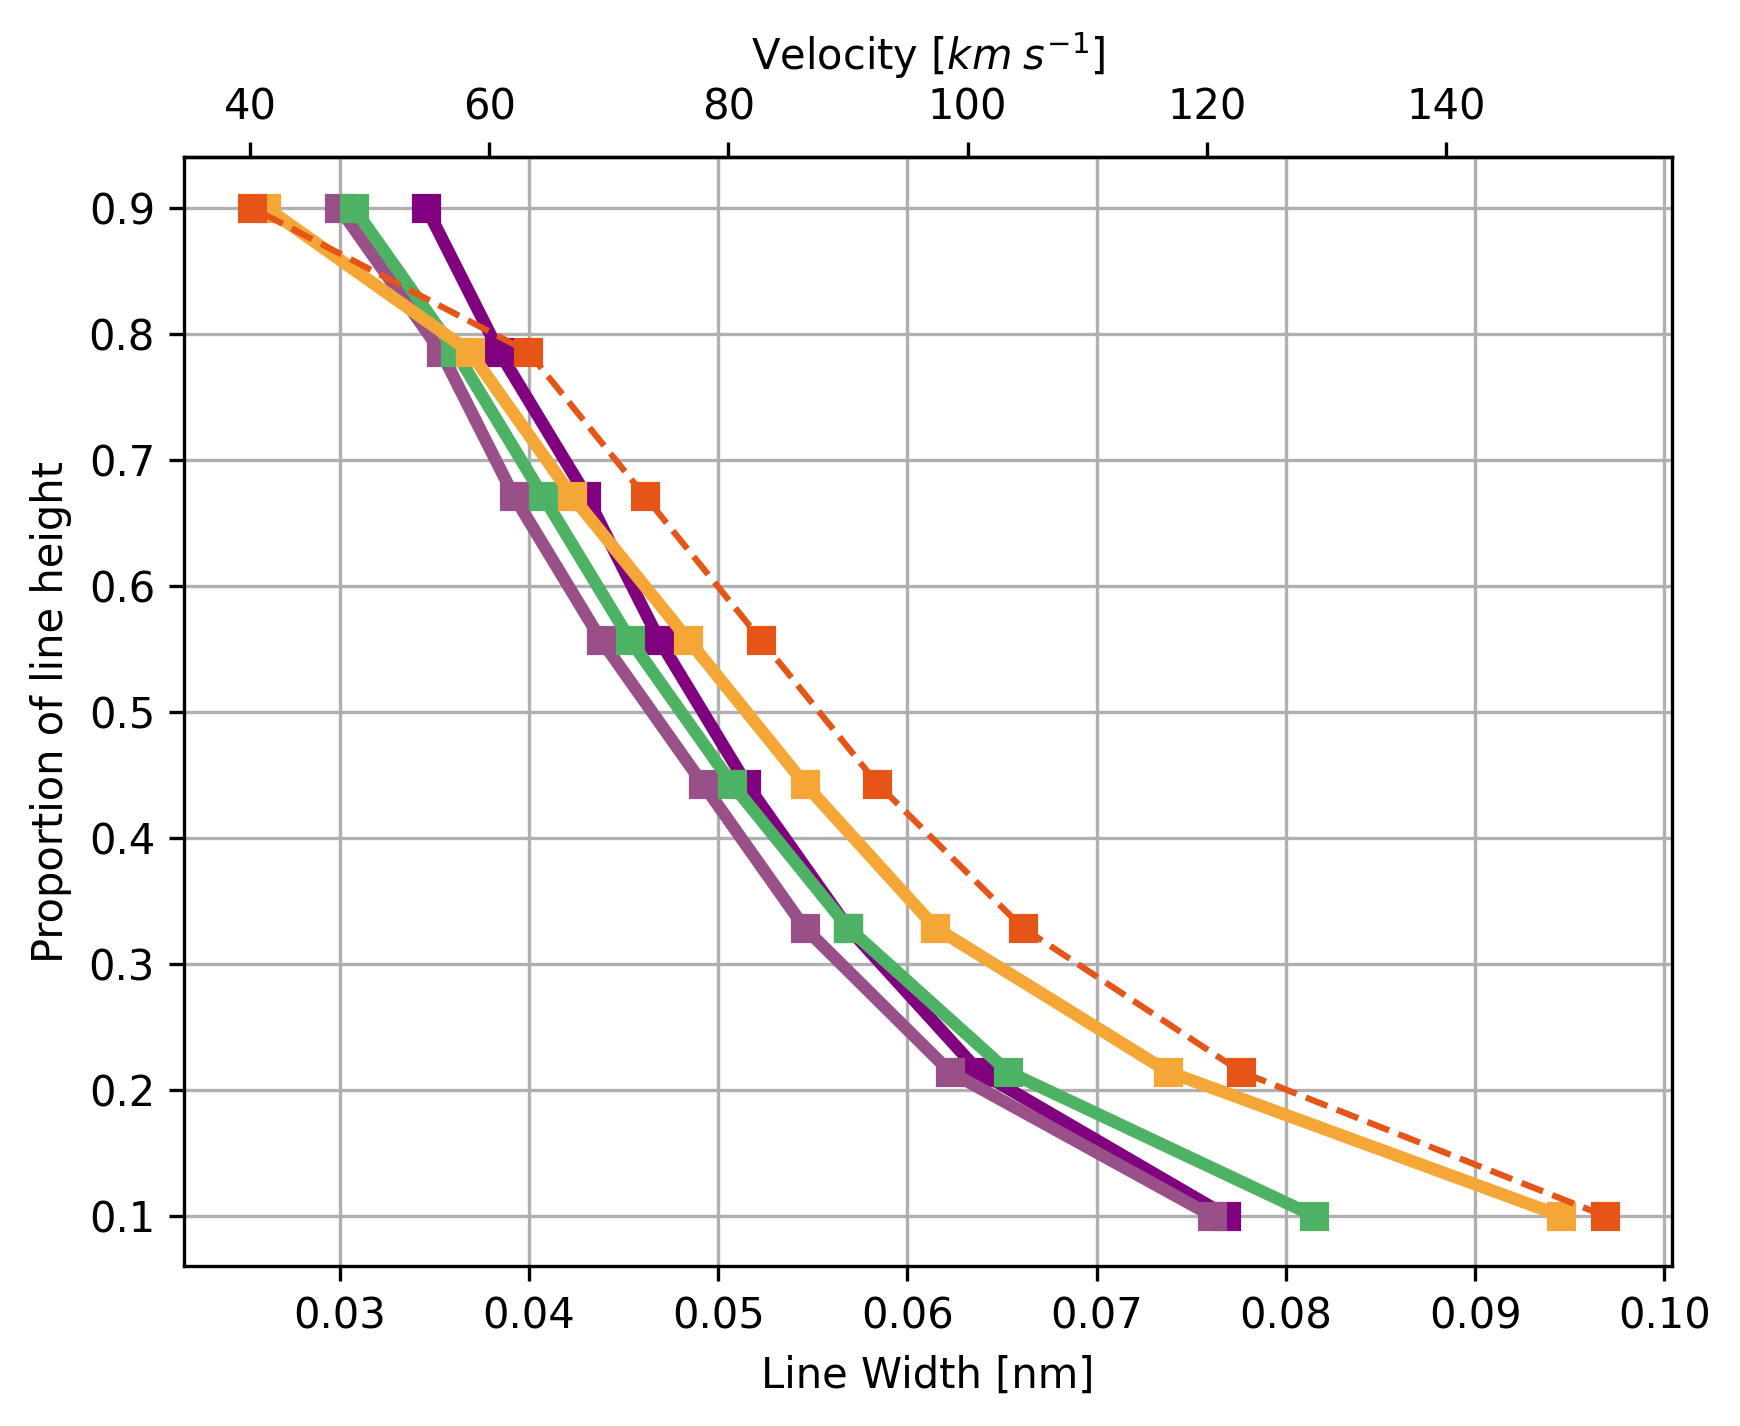

In [236]:
fig,ax=plt.subplots(dpi=300)

lamb0 = wl
c=2.99e5
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu
    #return ((((x+lamb0)/lamb0)-1)*c) #old, no mu angle difference

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)


for i in range(18):
    if i == 0:
        ax.plot(widths[i][1:-2],np.linspace(.1,.9,8),marker='s',color='purple',linewidth=3)
    elif i == 4 or i==10 or i == 15:
        ax.plot(widths[i][1:-2],np.linspace(.1,.9,8),marker='s',color=cmap_choice[i],linewidth=3)
    elif i == 17:
        ax.plot(widths[i][1:-2],np.linspace(.1,.9,8),marker='s',color=cmap_choice[i],linestyle='--',alpha=1)

    # else:
    #     ax.plot(widths[i][1:-2],np.linspace(.1,.9,8),marker='s',color=cmap_choice[i],linestyle='--',alpha=.8)
    # secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
    # secaxx.set_xlabel(r'Line Width $[nm]$')

secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
ax.set_xlabel(r'Line Width [nm]')
ax.set_ylabel('Proportion of line height')

In [1084]:
veltrans(centroidss0[i][3])

4.349634305804174

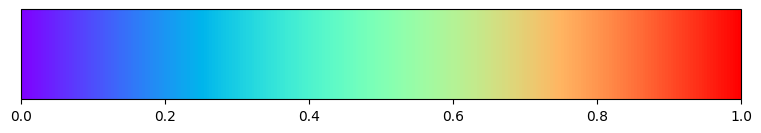

In [1085]:
a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap="rainbow")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)